In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/tokio'

df_from_each_file = list(load_files(dirname)) 
 

In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)


del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]


In [5]:
folders = df_merged['value']

df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))





In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


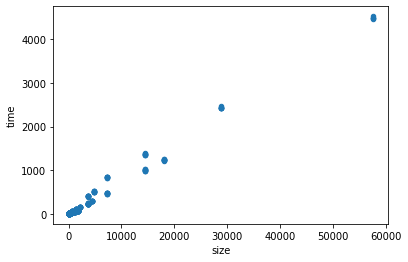

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

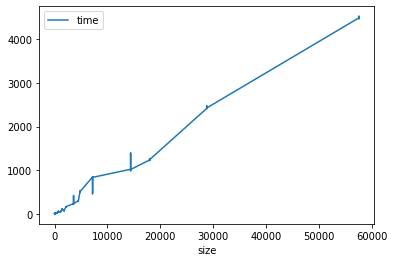

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

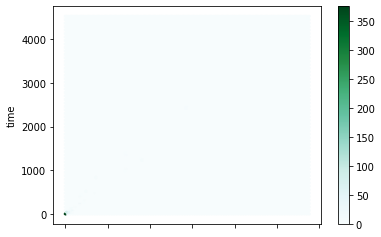

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

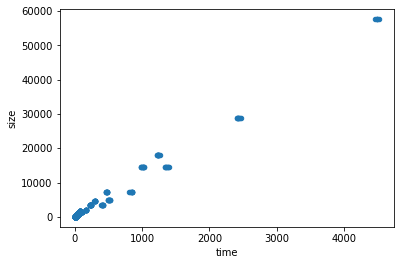

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

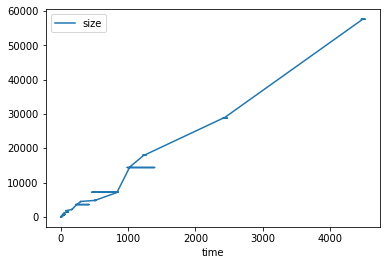

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
486,tokio,512-9600-24,4493.502555,512,9600,6.039798e+10,1.344118e+07,57600.00000
649,tokio,512-9600-6,4491.550554,512,9600,6.039798e+10,1.344702e+07,57600.00000
192,tokio,512-9600-36,4465.712784,512,9600,6.039798e+10,1.352482e+07,57600.00000
300,tokio,512-9600-48,4522.330591,512,9600,6.039798e+10,1.335550e+07,57600.00000
342,tokio,512-9600-12,4485.717154,512,9600,6.039798e+10,1.346451e+07,57600.00000
...,...,...,...,...,...,...,...,...
332,tokio,32-12-48,5.439929,32,12,2.949120e+05,5.421247e+04,0.28125
259,tokio,32-12-84,9.810593,32,12,2.949120e+05,3.006057e+04,0.28125
517,tokio,32-12-6,0.908678,32,12,2.949120e+05,3.245506e+05,0.28125
295,tokio,32-12-24,2.509983,32,12,2.949120e+05,1.174956e+05,0.28125


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
193,tokio,512-800-48,501.585676,512,800,5.033165e+09,1.003451e+07,4800.0
183,tokio,512-800-36,506.221241,512,800,5.033165e+09,9.942619e+06,4800.0
469,tokio,512-800-24,509.457802,512,800,5.033165e+09,9.879454e+06,4800.0
119,tokio,512-800-84,514.526708,512,800,5.033165e+09,9.782125e+06,4800.0
70,tokio,512-800-72,516.503943,512,800,5.033165e+09,9.744678e+06,4800.0
403,tokio,512-800-12,518.928924,512,800,5.033165e+09,9.699141e+06,4800.0
184,tokio,512-800-60,522.302828,512,800,5.033165e+09,9.636488e+06,4800.0
256,tokio,512-1200-60,812.457970,512,1200,7.549747e+09,9.292477e+06,7200.0
92,tokio,512-1200-12,823.692401,512,1200,7.549747e+09,9.165736e+06,7200.0
100,tokio,512-1200-72,836.755361,512,1200,7.549747e+09,9.022646e+06,7200.0


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
279,tokio,32-12-2,0.665581,32,12,2.949120e+05,4.430895e+05,0.28125
335,tokio,32-12-3,0.739335,32,12,2.949120e+05,3.988883e+05,0.28125
324,tokio,64-12-2,0.754773,64,12,1.179648e+06,1.562918e+06,1.12500
458,tokio,64-12-3,0.864528,64,12,1.179648e+06,1.364499e+06,1.12500
530,tokio,32-24-2,0.905547,32,24,5.898240e+05,6.513457e+05,0.56250
...,...,...,...,...,...,...,...,...
192,tokio,512-9600-36,4465.712784,512,9600,6.039798e+10,1.352482e+07,57600.00000
342,tokio,512-9600-12,4485.717154,512,9600,6.039798e+10,1.346451e+07,57600.00000
649,tokio,512-9600-6,4491.550554,512,9600,6.039798e+10,1.344702e+07,57600.00000
486,tokio,512-9600-24,4493.502555,512,9600,6.039798e+10,1.344118e+07,57600.00000


<AxesSubplot:xlabel='time'>

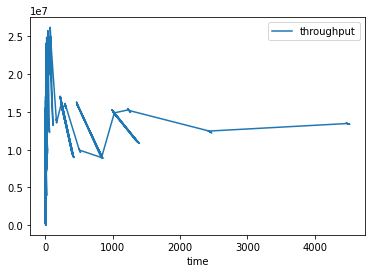

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

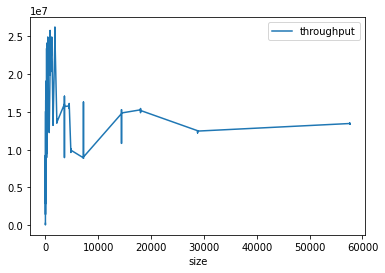

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

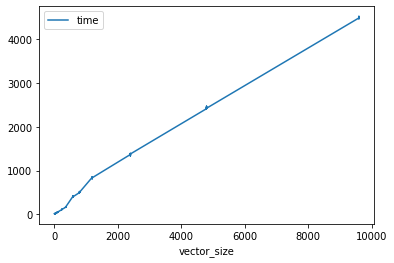

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

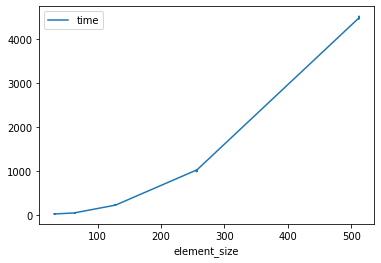

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

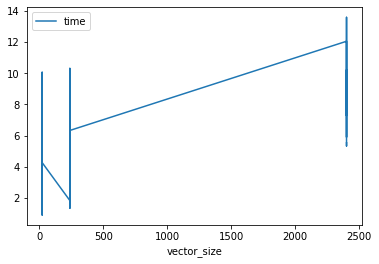

In [22]:
a[a.value.str.contains(r"^32-24")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

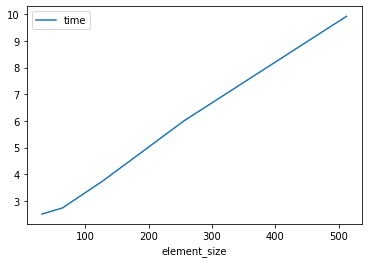

In [23]:
a[a.value.str.contains(r".*-12-24$")].plot(x='element_size', y='time')


In [40]:
b[b.value.str.contains(r"^512-")]


,function,value,time,element_size,vector_size,throughput_num,throughput,size
294,tokio,512-12-6,8.848068,512,12,7.549747e+07,8.532650e+06,72.0
331,tokio,512-12-12,9.124668,512,12,7.549747e+07,8.273996e+06,72.0
516,tokio,512-12-2,9.452271,512,12,7.549747e+07,7.987231e+06,72.0
175,tokio,512-12-24,9.922611,512,12,7.549747e+07,7.608630e+06,72.0
611,tokio,512-12-36,11.902303,512,12,7.549747e+07,6.343098e+06,72.0
...,...,...,...,...,...,...,...,...
192,tokio,512-9600-36,4465.712784,512,9600,6.039798e+10,1.352482e+07,57600.0
342,tokio,512-9600-12,4485.717154,512,9600,6.039798e+10,1.346451e+07,57600.0
649,tokio,512-9600-6,4491.550554,512,9600,6.039798e+10,1.344702e+07,57600.0
486,tokio,512-9600-24,4493.502555,512,9600,6.039798e+10,1.344118e+07,57600.0


In [25]:
a[a.value.str.contains(r".*-800-23$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size


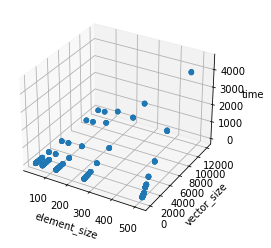

In [26]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


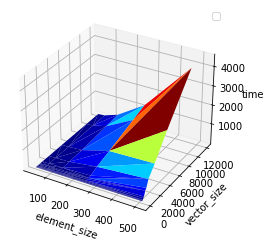

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


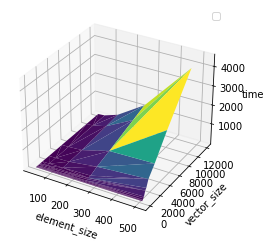

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


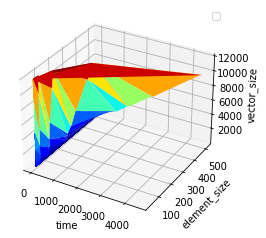

In [29]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

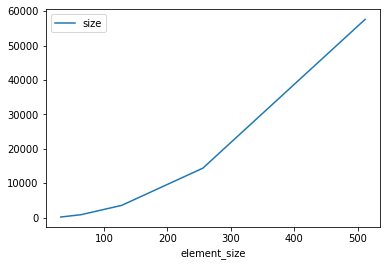

In [30]:
a[a.value.str.contains(r".*-9600-.*")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

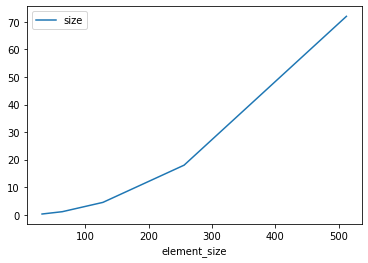

In [31]:
a[a.value.str.contains(r".*-12-.*")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

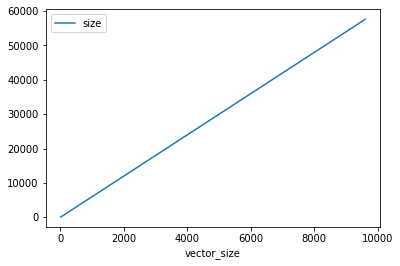

In [32]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

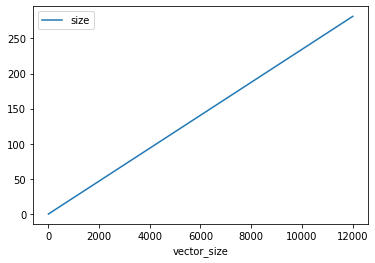

In [33]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [41]:
b[b.value.str.contains(r"^512-800")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
578,tokio,512-800-6,497.039537,512,800,5.033165e+09,1.012629e+07,4800.0
470,tokio,512-800-2,498.740168,512,800,5.033165e+09,1.009176e+07,4800.0
400,tokio,512-800-3,499.789633,512,800,5.033165e+09,1.007057e+07,4800.0
193,tokio,512-800-48,501.585676,512,800,5.033165e+09,1.003451e+07,4800.0
183,tokio,512-800-36,506.221241,512,800,5.033165e+09,9.942619e+06,4800.0
469,tokio,512-800-24,509.457802,512,800,5.033165e+09,9.879454e+06,4800.0
119,tokio,512-800-84,514.526708,512,800,5.033165e+09,9.782125e+06,4800.0
70,tokio,512-800-72,516.503943,512,800,5.033165e+09,9.744678e+06,4800.0
403,tokio,512-800-12,518.928924,512,800,5.033165e+09,9.699141e+06,4800.0
184,tokio,512-800-60,522.302828,512,800,5.033165e+09,9.636488e+06,4800.0


In [35]:
import re
#n_threads = [2, 3, 6, 12, 24, 36, 48, 60, 72, 84]

#n_threads = [2, 6, 12, 24, 36, 48, 60, 72]

n_threads = [2,24,36,48]
cluster = list(map(lambda n: b[b.value.str.contains(r'-'+str(n)+'$')], n_threads))

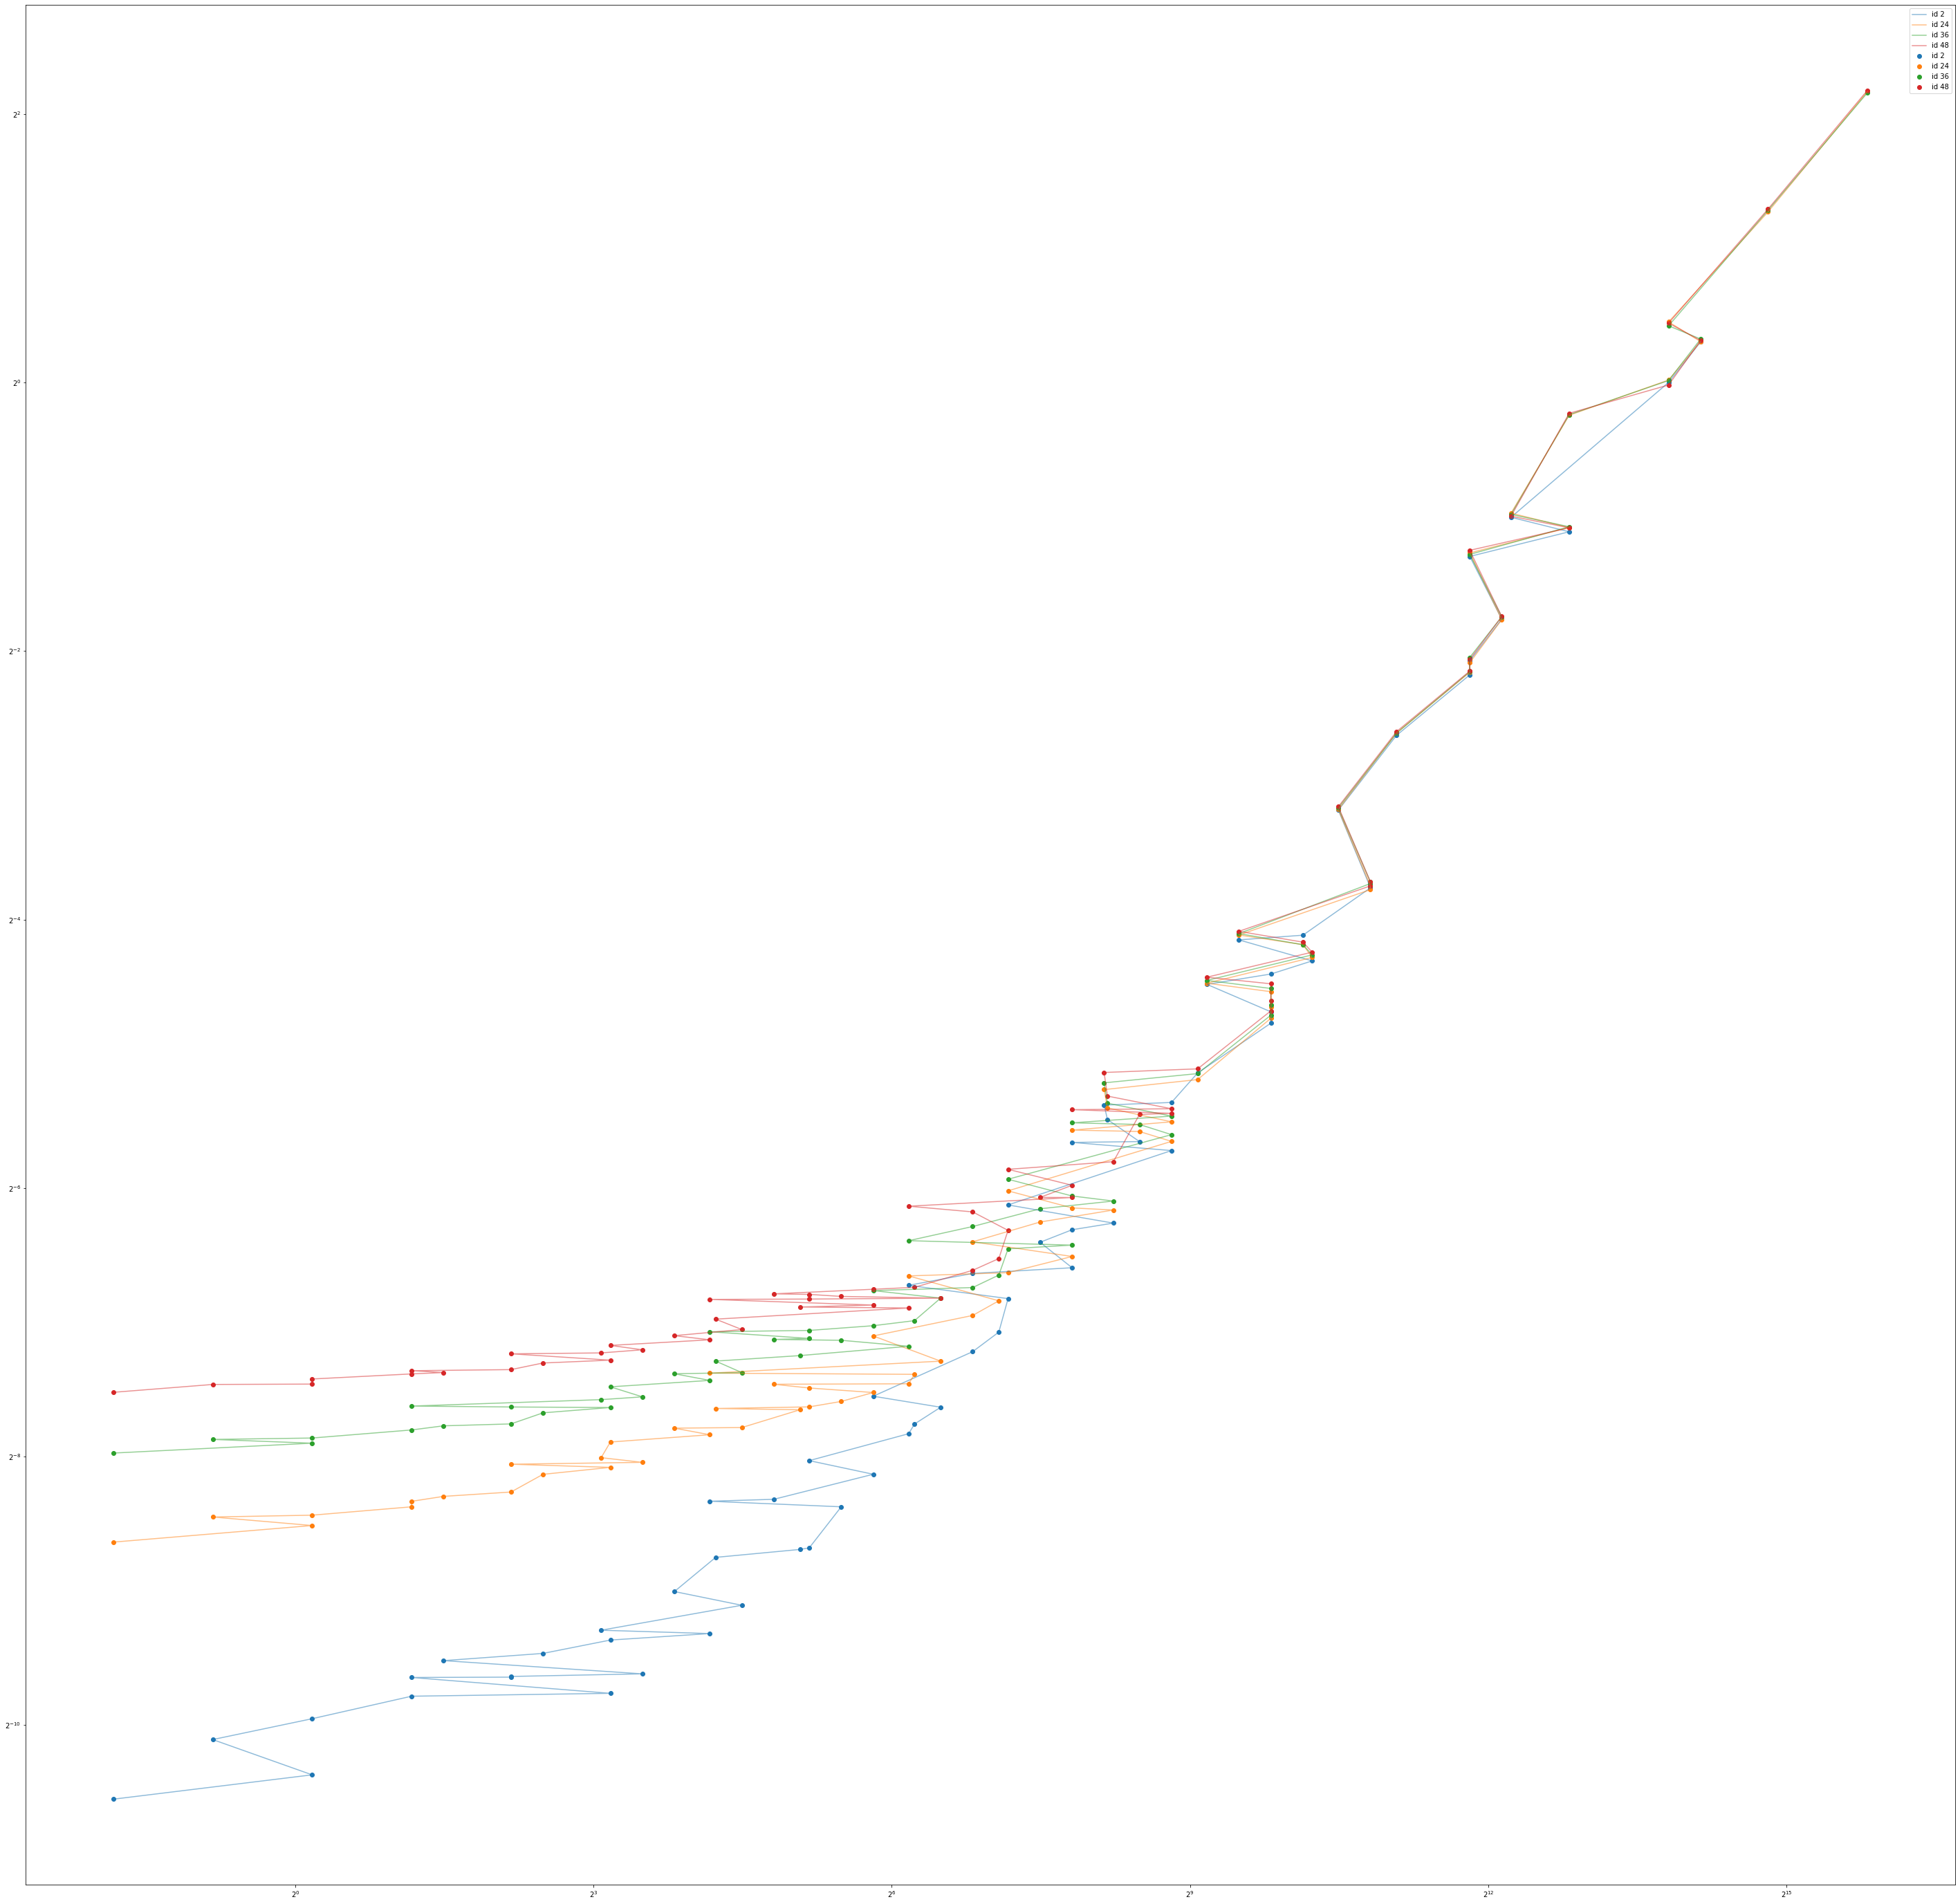

In [59]:
for i in range(len(n_threads)):
    plt.scatter(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])

    plt.plot(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i], alpha=0.5)
plt.legend()
plt.xscale('log',base=2) 
plt.yscale('log',base=2) 
plt.rcParams["figure.figsize"] = (50,50)

#default_dpi = mpl.rcParamsDefault['figure.dpi']
#mpl.rcParams['figure.dpi'] = default_dpi*2
plt.show()
    


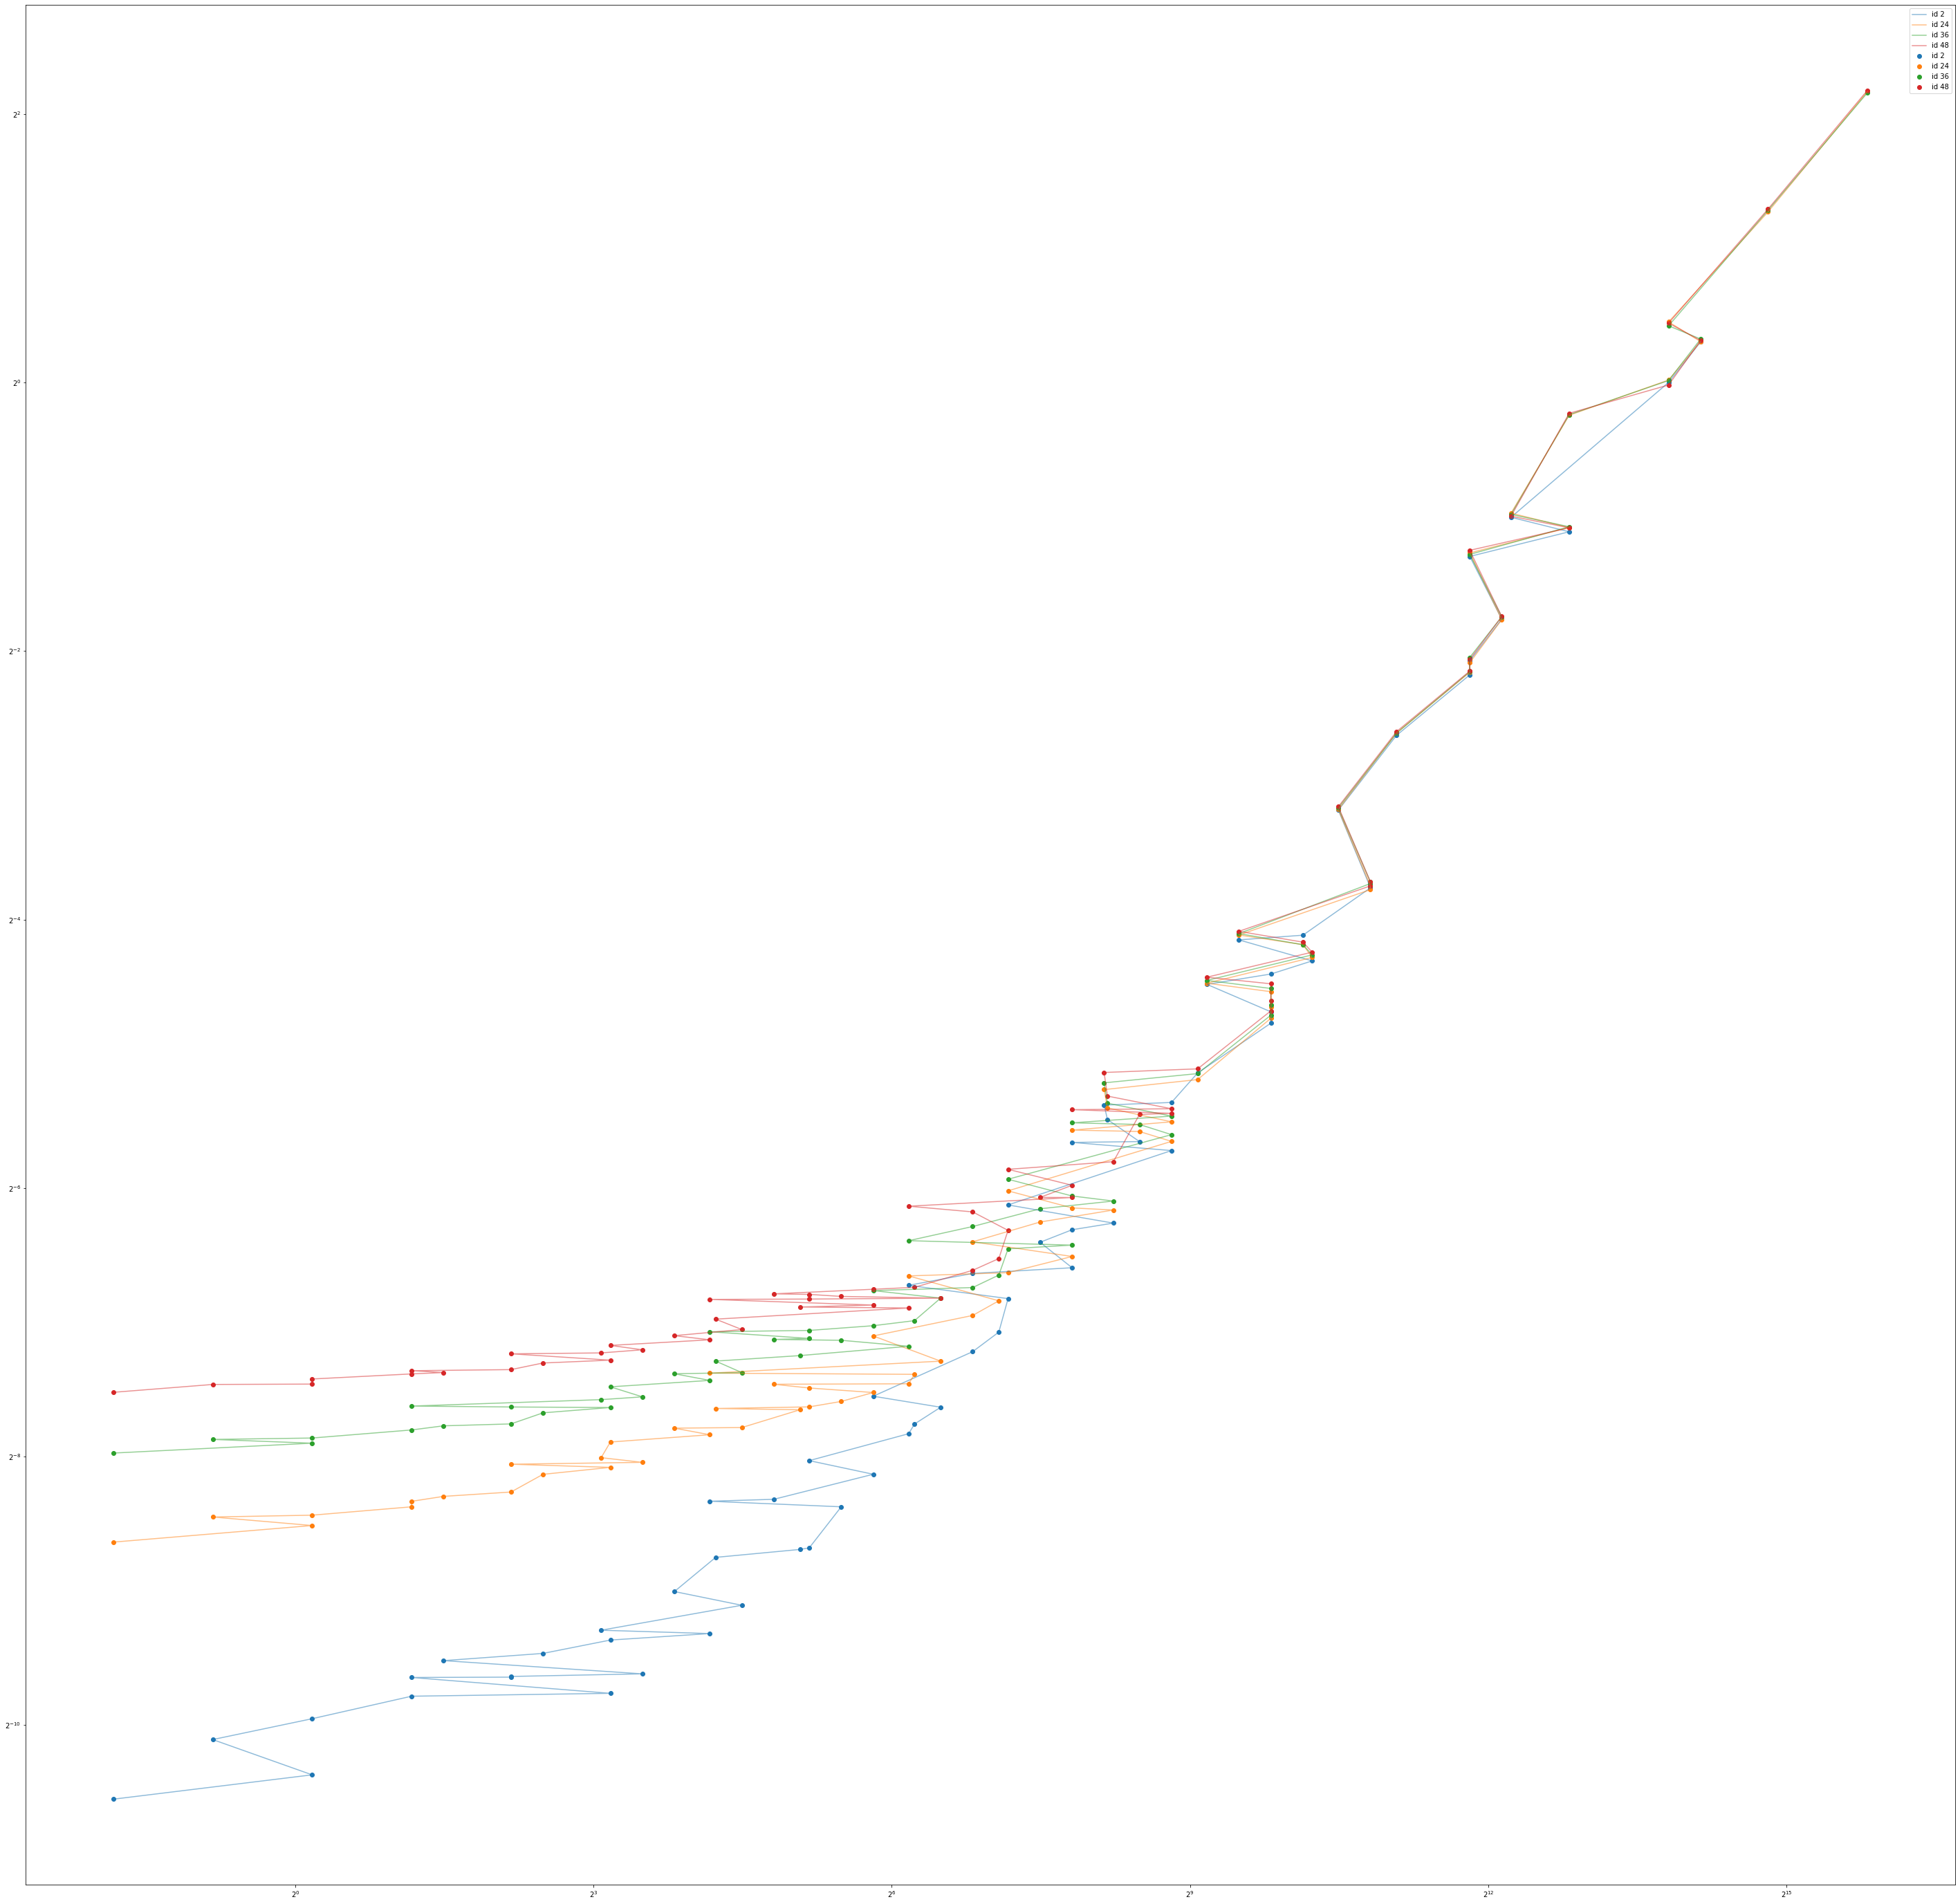

In [58]:
for i in range(len(n_threads)):
    plt.scatter(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])

    plt.plot(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i], alpha=0.5)
plt.legend()
plt.xscale('log',base=2) 
plt.yscale('log',base=2) 
plt.rcParams["figure.figsize"] = (50,50)

#default_dpi = mpl.rcParamsDefault['figure.dpi']
#mpl.rcParams['figure.dpi'] = default_dpi*2
plt.show()

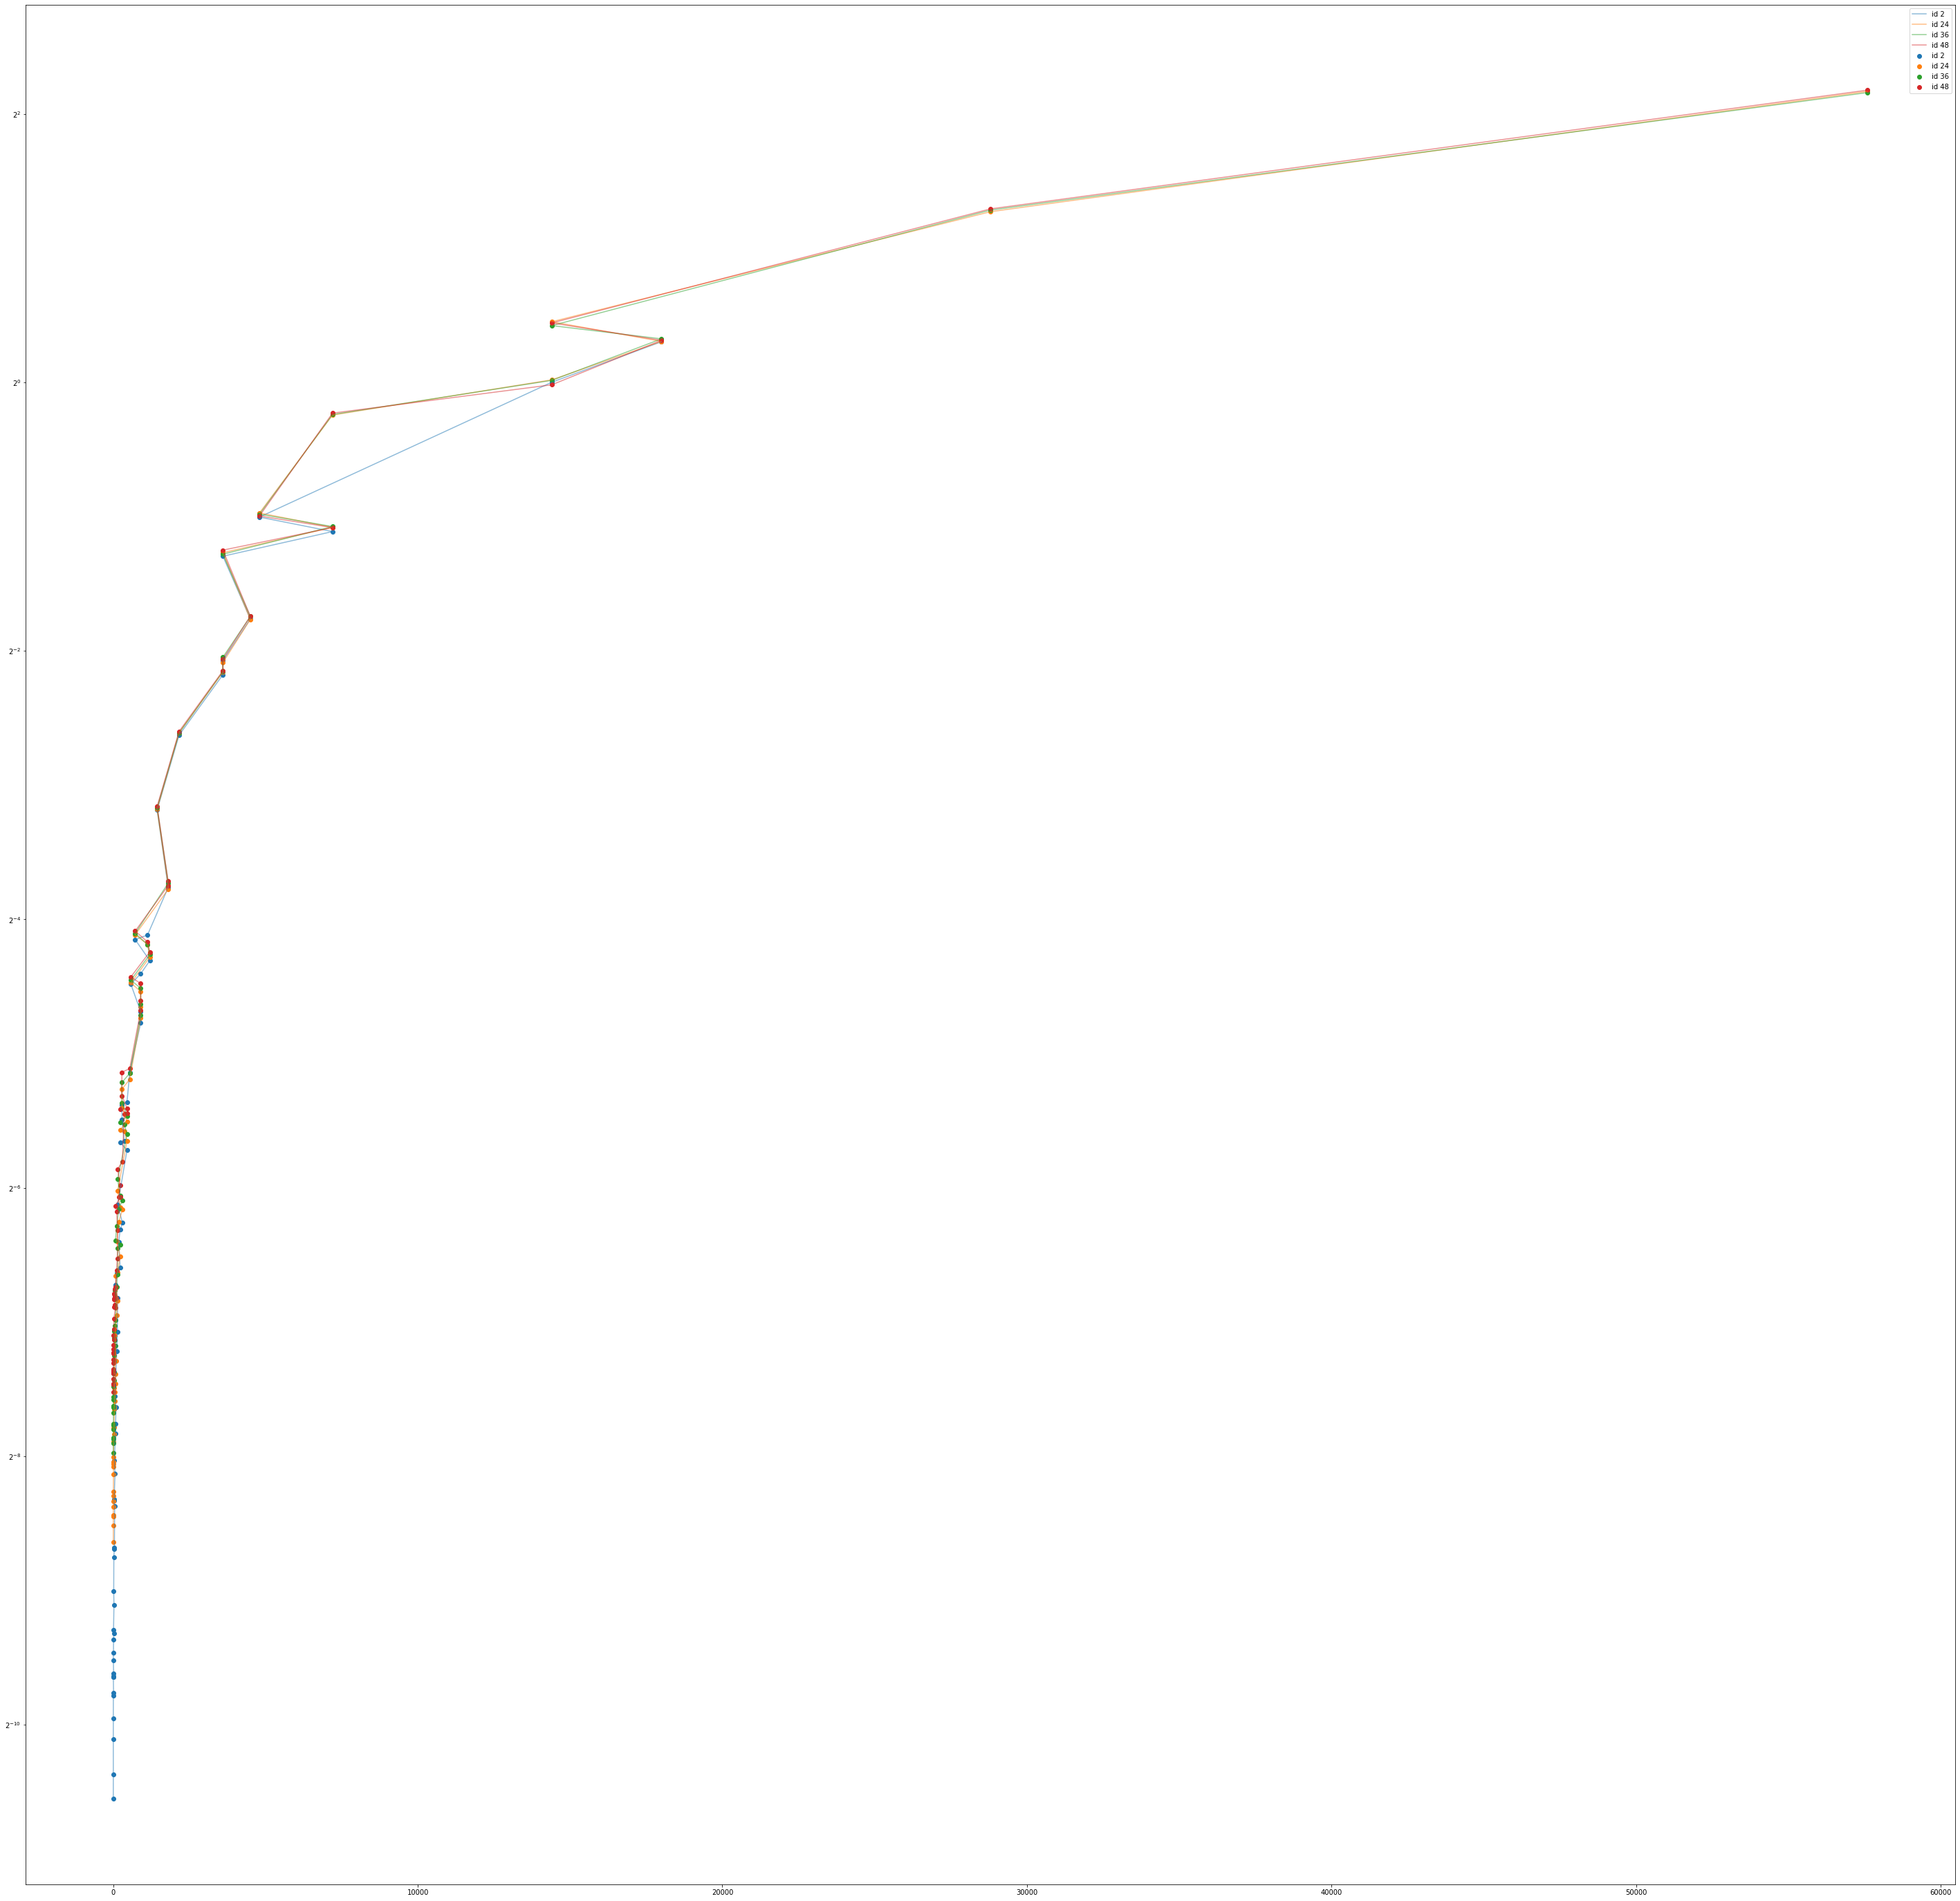

In [61]:
for i in range(len(n_threads)):
    plt.scatter(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])

    plt.plot(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i], alpha=0.5)
plt.legend()

plt.yscale('log',base=2) 
plt.rcParams["figure.figsize"] = (50,50)

#default_dpi = mpl.rcParamsDefault['figure.dpi']
#mpl.rcParams['figure.dpi'] = default_dpi*2
plt.show()

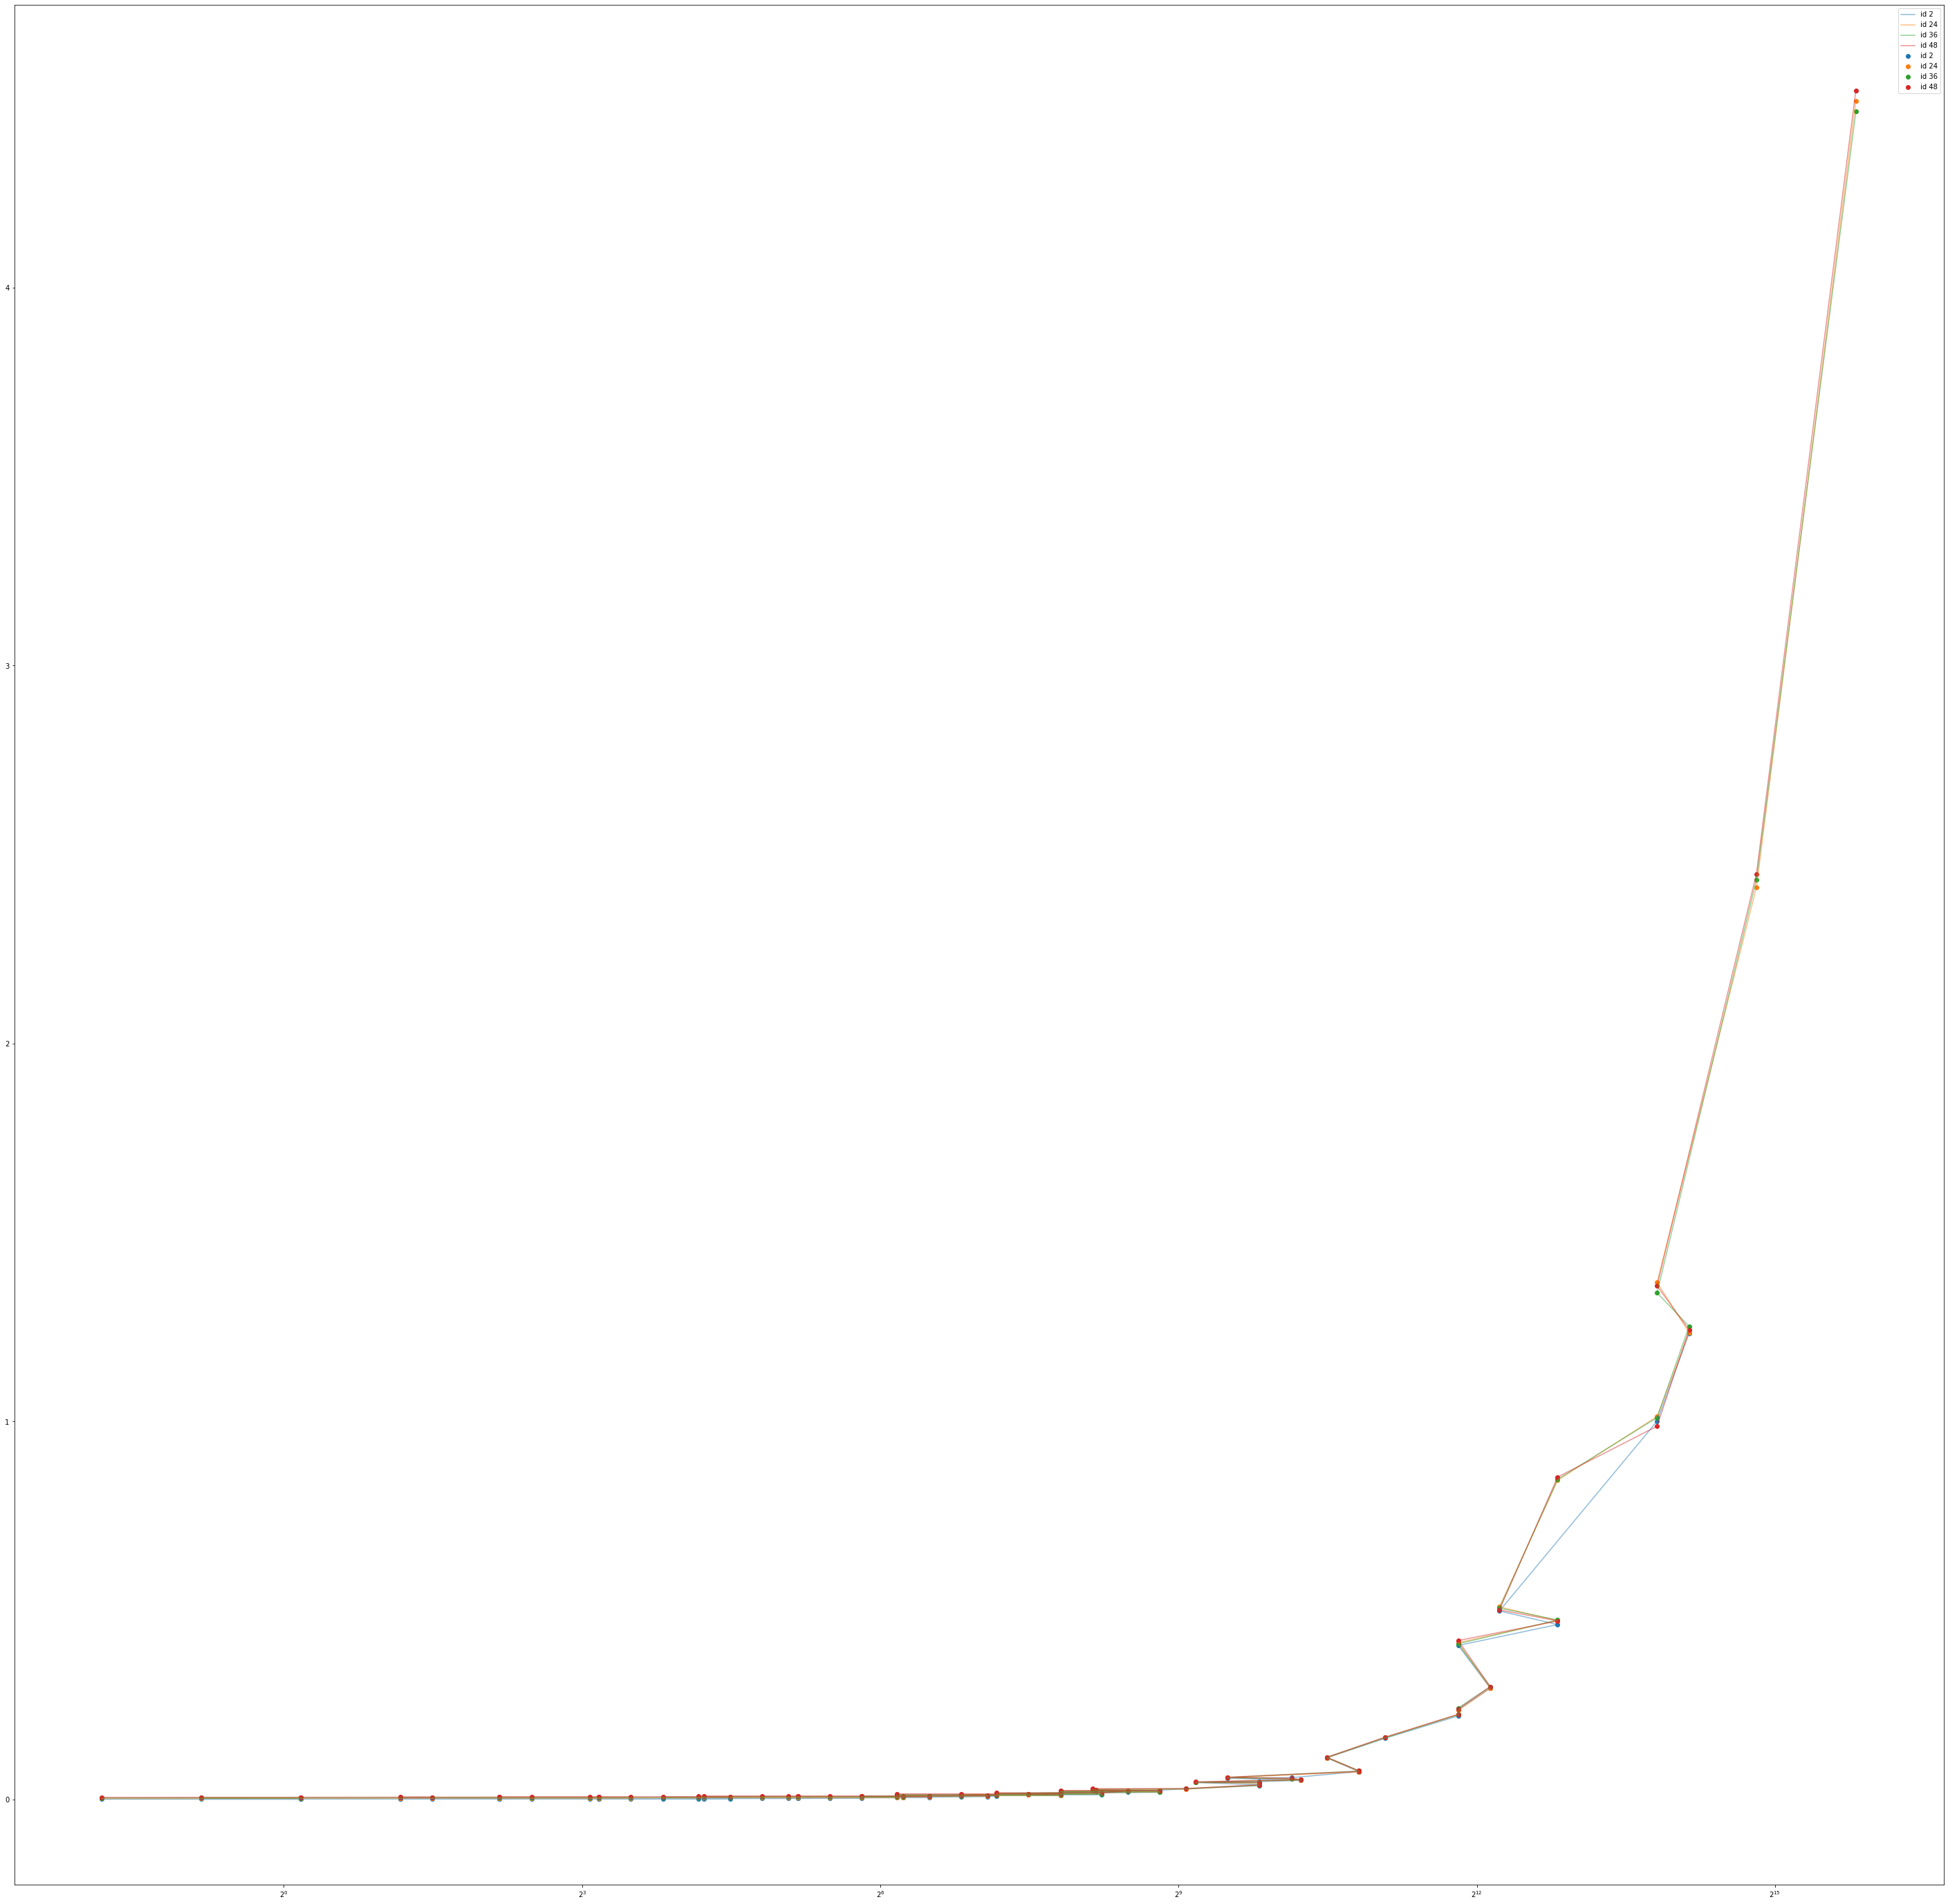

In [63]:
for i in range(len(n_threads)):
    plt.scatter(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])

    plt.plot(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i], alpha=0.5)
plt.legend()
plt.xscale('log',base=2) 

plt.rcParams["figure.figsize"] = (50,50)

#default_dpi = mpl.rcParamsDefault['figure.dpi']
#mpl.rcParams['figure.dpi'] = default_dpi*2
plt.show()

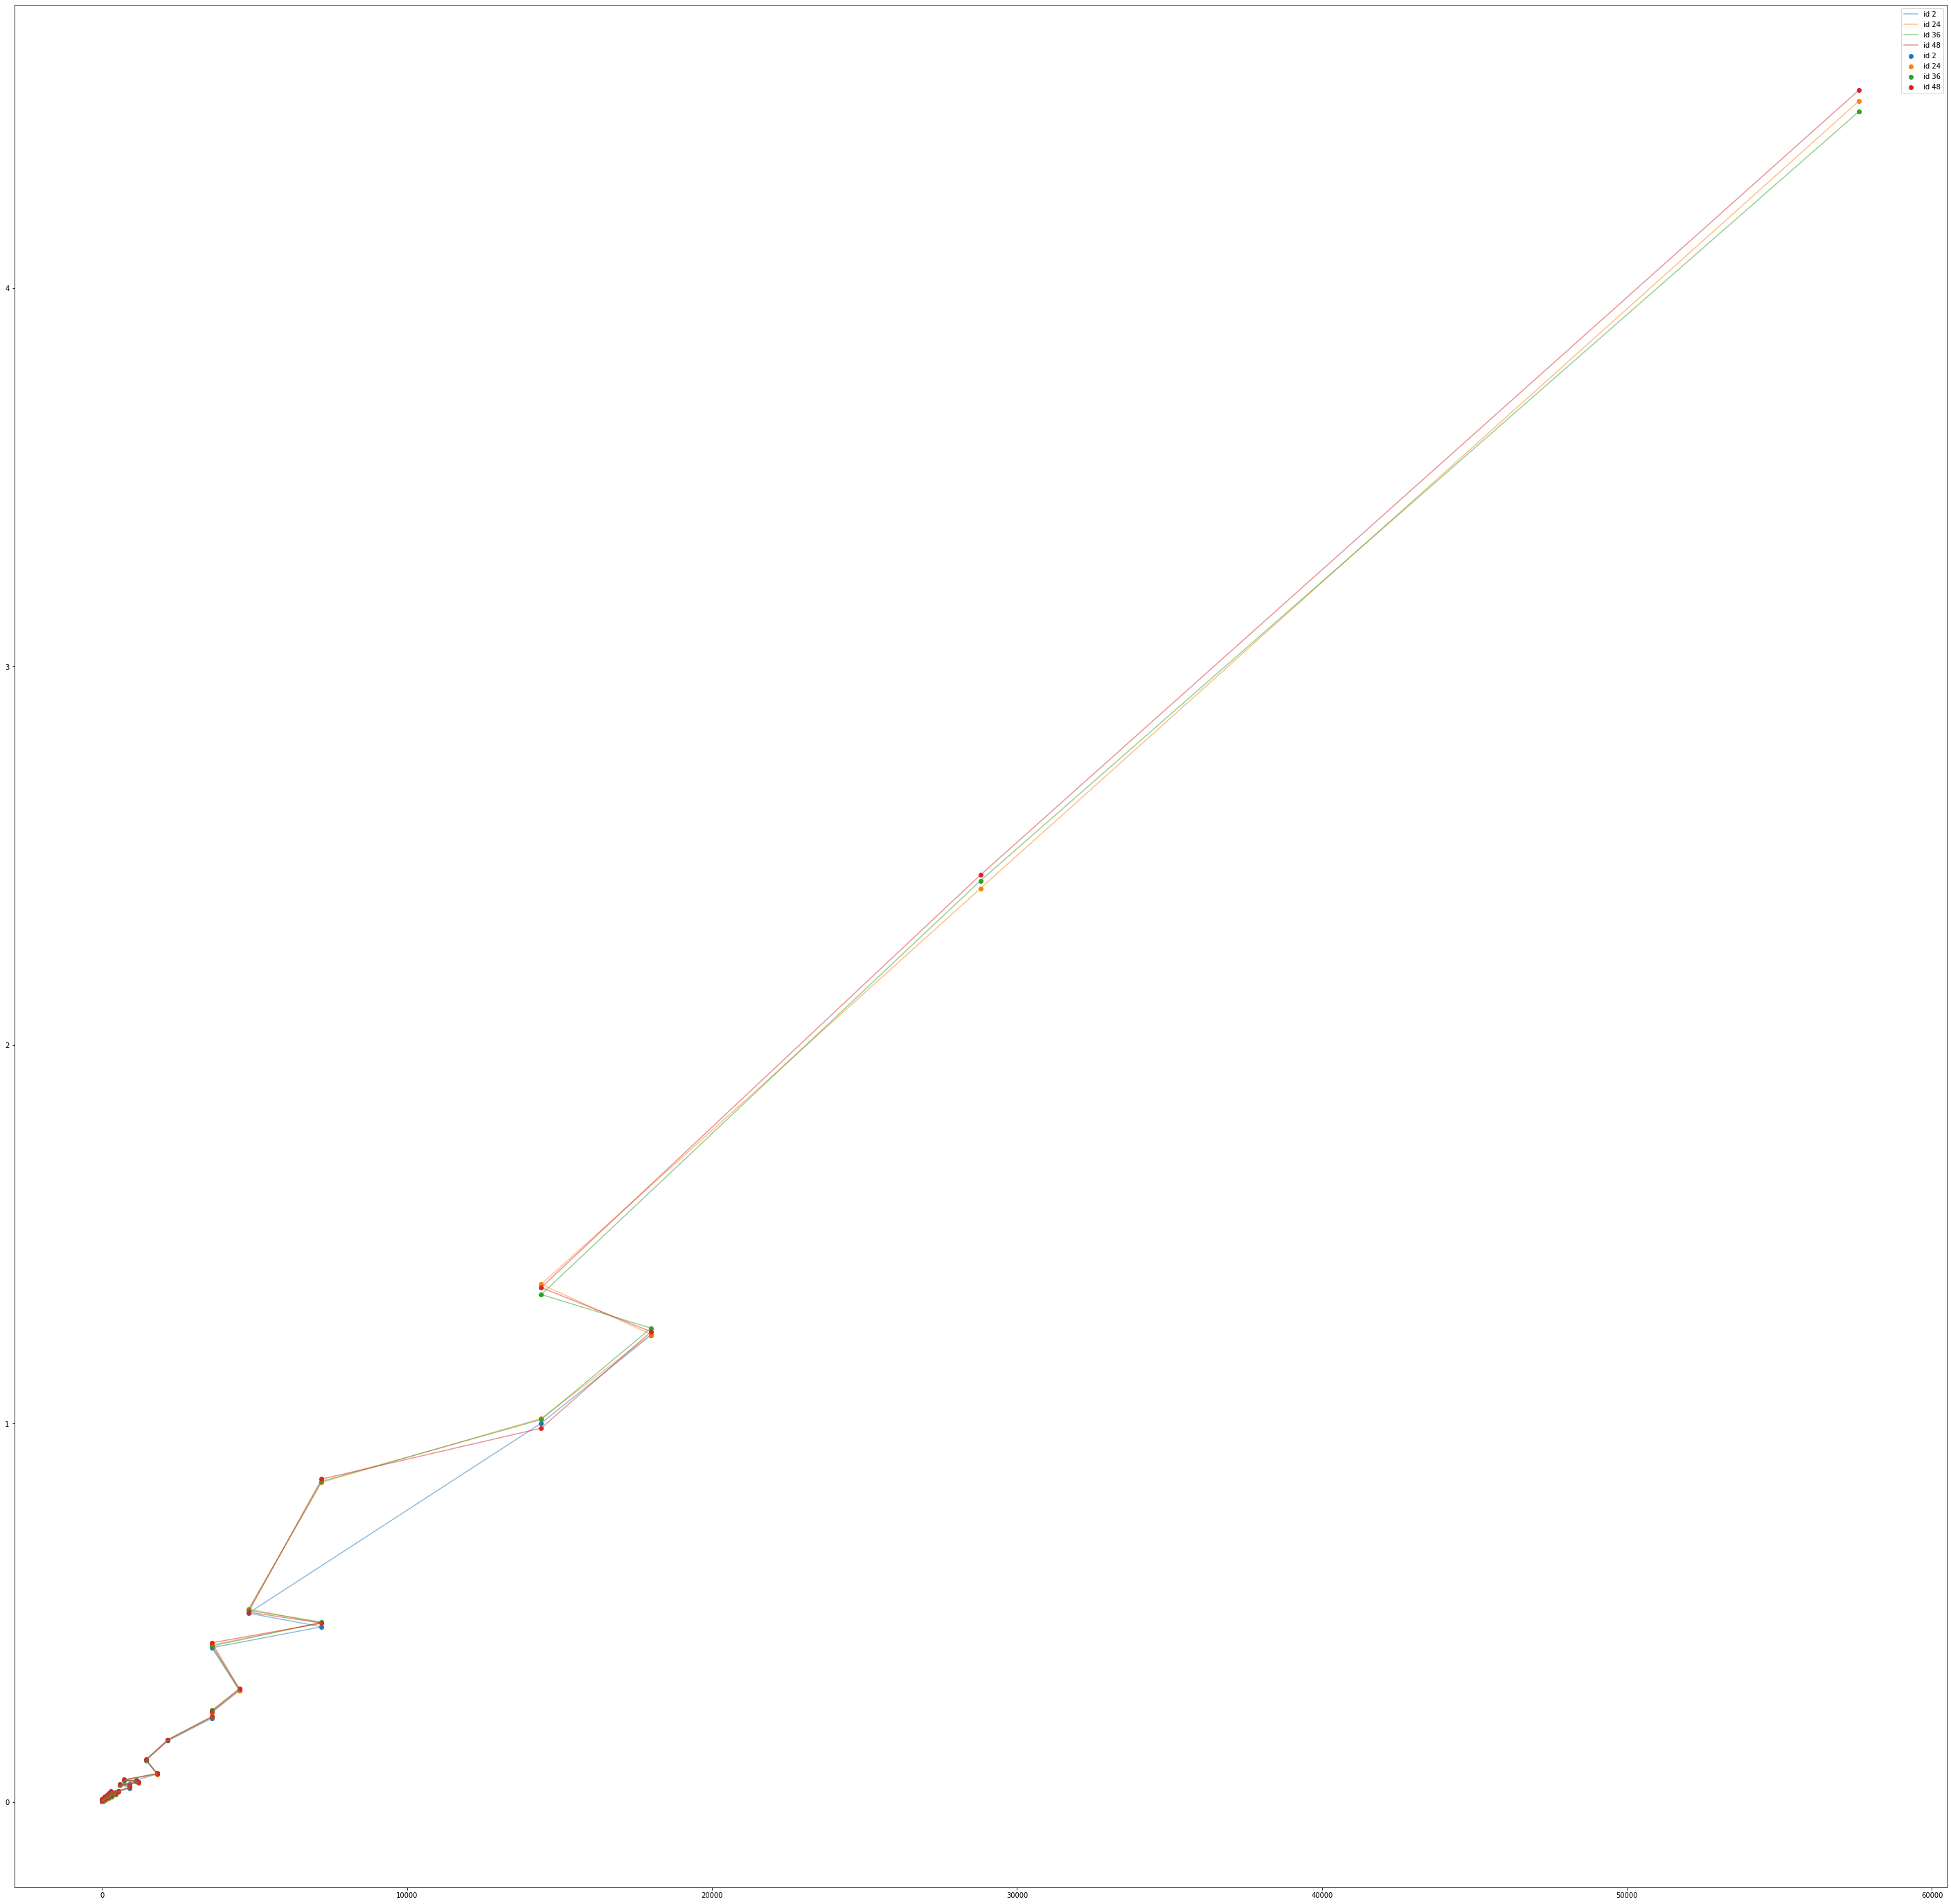

In [64]:
for i in range(len(n_threads)):
    plt.scatter(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])

    plt.plot(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i], alpha=0.5)
plt.legend()

plt.rcParams["figure.figsize"] = (50,50)

#default_dpi = mpl.rcParamsDefault['figure.dpi']
#mpl.rcParams['figure.dpi'] = default_dpi*2
plt.show()

In [65]:
b[b.value.str.contains(r'-2$')]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
279,tokio,32-12-2,0.665581,32,12,2.949120e+05,4.430895e+05,0.28125
324,tokio,64-12-2,0.754773,64,12,1.179648e+06,1.562918e+06,1.12500
530,tokio,32-24-2,0.905547,32,24,5.898240e+05,6.513457e+05,0.56250
0,tokio,32-48-2,1.008468,32,48,1.179648e+06,1.169743e+06,1.12500
38,tokio,64-24-2,1.132686,64,24,2.359296e+06,2.082921e+06,2.25000
...,...,...,...,...,...,...,...,...
657,tokio,512-600-2,407.426121,512,600,3.774874e+09,9.265173e+06,3600.00000
647,tokio,256-4800-2,462.740704,256,4800,7.549747e+09,1.631529e+07,7200.00000
470,tokio,512-800-2,498.740168,512,800,5.033165e+09,1.009176e+07,4800.00000
453,tokio,256-9600-2,1000.707886,256,9600,1.509949e+10,1.508881e+07,14400.00000


In [66]:
b[b.value.str.contains(r'-36$')]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
292,tokio,32-12-36,3.975190,32,12,2.949120e+05,7.418816e+04,0.28125
102,tokio,64-12-36,4.183413,64,12,1.179648e+06,2.819822e+05,1.12500
120,tokio,32-24-36,4.265538,32,24,5.898240e+05,1.382766e+05,0.56250
51,tokio,32-48-36,4.296413,32,48,1.179648e+06,2.745658e+05,1.12500
474,tokio,64-24-36,4.479079,64,24,2.359296e+06,5.267369e+05,2.25000
...,...,...,...,...,...,...,...,...
532,tokio,256-9600-36,1010.368639,256,9600,1.509949e+10,1.494454e+07,14400.00000
378,tokio,256-12000-36,1251.839845,256,12000,1.887437e+10,1.507730e+07,18000.00000
441,tokio,512-2400-36,1340.576500,512,2400,1.509949e+10,1.126343e+07,14400.00000
289,tokio,512-4800-36,2433.850106,512,4800,3.019899e+10,1.240791e+07,28800.00000
